# Data Loading and Preliminary Analysis

In this section, we load the census data and perform initial exploration to understand its structure and identify any immediate data cleaning needs.

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('census09.csv')

# Displaying the first few rows of the dataset
df

House Number           Street First Name      Surname Age  \
0                1    Rhubarb Drive        Amy         Hall  41   
1                1    Rhubarb Drive      Bruce       Murphy  49   
2                1    Rhubarb Drive      Billy         Hall  17   
3                1    Rhubarb Drive       Mary         Hall  15   
4                1    Rhubarb Drive    Elliott         Hall  13   
...            ...              ...        ...          ...  ..   
9723             1  Taylor Barracks       Anne       Turner  42   
9724             1  Taylor Barracks     Graham  Turner-Rose  44   
9725             1  Taylor Barracks    William  Turner-Rose  20   
9726             1  Taylor Barracks       Rita  Turner-Rose  14   
9727             1  Taylor Barracks      Terry  Turner-Rose  12   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                          Partner         Single    Male   
2                              Son            NaN    Male   
3                         Daughter            NaN  Female   
4                              Son            NaN    Male   
...                            ...            ...     ...   
9723                          Head        Married  Female   
9724                       Husband        Married    Male   
9725                           Son         Single    Male   
9726                      Daughter            NaN  Female   
9727                           Son            NaN    Male   

                                   Occupation Infirmity  Religion  
0                           Drilling engineer      None  Catholic  
1     Scientist, research (physical sciences)      None  Catholic  
2                                     Student      None       NaN  
3                                     Student      None       NaN  
4                                     Student      None       NaN  
...                                       ...       ...       ...  
9723                   Operational researcher      None      None  
9724                  Presenter, broadcasting      None      None  
9725                       University Student      None      None  
9726                                  Student      None       NaN  
9727                                  Student      None       NaN  

[9728 rows x 11 columns]

In [3]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9728 non-null   int64 
 1   Street                         9728 non-null   object
 2   First Name                     9728 non-null   object
 3   Surname                        9728 non-null   object
 4   Age                            9728 non-null   object
 5   Relationship to Head of House  9728 non-null   object
 6   Marital Status                 7455 non-null   object
 7   Gender                         9728 non-null   object
 8   Occupation                     9728 non-null   object
 9   Infirmity                      9728 non-null   object
 10  Religion                       7386 non-null   object
dtypes: int64(1), object(10)
memory usage: 836.1+ KB
None


In [4]:
# Statistical summary of the dataset
print(df.describe())

       House Number
count   9728.000000
mean      41.165090
std       47.339542
min        1.000000
25%       10.000000
50%       24.000000
75%       48.000000
max      230.000000


In [5]:
# Checking for Null values
print(df.isnull().sum())

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2273
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2342
dtype: int64


# Data Cleaning

In this section, we will clean the dataset by converting data types where necessary and handling missing values.

### Data Types of the Columns

In [6]:
#checking the type of each column
df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

### Cleaning the House Number

In [7]:
df[df['House Number'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

### Cleaning the Street	

In [8]:
df[df['Street'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

### Cleaning the First Name

In [9]:
df[df['First Name'] == ' ']

House Number        Street First Name  Surname Age  \
2614            21  Webb Parkway             Gardner  21   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2614                      Daughter         Single  Female  University Student   

     Infirmity Religion  
2614      None     None

### Cleaning the Surname

In [10]:
df[df['Surname'] == ' ']

House Number      Street First Name Surname Age  \
5613            28  Kelly Dale     Rachel          37   

     Relationship to Head of House Marital Status  Gender  \
5613                          Head         Single  Female   

                        Occupation Infirmity   Religion  
5613  Medical sales representative      None  Christian

In [11]:
df[(df['First Name'] == ' ') & (df['Surname'] == ' ')]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## Gender

In [12]:
#checking for unique values on Gender
df["Gender"].unique()

array(['Female', 'Male', ' '], dtype=object)

In [13]:
#checking for the highest occurring values on the Gender column
df['Gender'].mode()

0    Female
Name: Gender, dtype: object

### Cleaning the Age

In [14]:
df['Age'].unique()

array(['41', '49', '17', '15', '13', '7', '6', '5', '4', '2', '58', '33',
       '26', '36', '47', '51', '19', '42', '44', '8', '0', '60', '56',
       '12', '46', '30', '76', '64', '63', '62', '53', '45', '37', '10',
       '24', '3', '57', '39', '29', '27', '59', '20', '32', '18', '34',
       '21', '11', '52', '50', '85', '87', '9', '61', '35', '31', '23',
       '48', '73', '25', '88', '90', '28', '71', '69', '54', '22', '68',
       '16', '55', '67', '91', '43', '40', '38', '1', '81', '79', '14',
       '70', '77', '72', '66', '65', '84', '78', '100', '92', '93', '74',
       '83', '75', '105', '82', '89', '86', '103', '80', '96', '102',
       '98', '97', '95.20845345950883', '97.20845345950883',
       '46.99999999999999', '104', '110', '101', '99',
       '50.68642589738663', '0.0', '71.70511965460919',
       '74.70511965460919', '13.0', '84.3600933267044', ' ',
       '78.78623363918231', '30.0', '27.0', '24.0', '94', '109'],
      dtype=object)

In [15]:
df[df['Age'] == ' ']

House Number       Street First Name Surname Age  \
6819            33  Bank Street    Georgia   Poole       
9422            32    Bank Burg   Mitchell  Jordan       

     Relationship to Head of House Marital Status  Gender  \
6819                          Head        Married  Female   
9422                       Partner         Single    Male   

                      Occupation Infirmity   Religion  
6819  Retired Production manager      None   Catholic  
9422             Sales executive      None  Christian

## Relationship to Head of House

In [16]:
df[df['Relationship to Head of House'] == ' ']

House Number         Street First Name Surname Age  \
8790            18  Taurus Garden     Graeme   Sykes  23   

     Relationship to Head of House Marital Status Gender       Occupation  \
8790                                     Divorced   Male  Ophthalmologist   

     Infirmity Religion  
8790      None     None

## Marital Status

In [17]:
df['Marital Status'].unique()

array(['Single', nan, 'Married', 'Widowed', 'Divorced', ' '], dtype=object)

In [18]:
df[df['Marital Status'] == ' ']

House Number                 Street First Name Surname Age  \
4590             5  CherryChestnut Street      Leigh   Ellis  12   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
4590                           Son                  Male    Student      None   

     Religion  
4590      NaN

In [19]:
# Replacing the space in marital status with NA because the person is a child of 12 years
df['Marital Status'].replace(' ', 'NA', inplace=True) 

In [20]:
# Replacing nan with NA
df['Marital Status'].replace('nan', 'NA', inplace=True) 

In [21]:
# pop_df['Religion'] = pop_df['Religion'].fillna(pop_df['Religion'].mode()[0])
df['Religion'] = df['Religion'].fillna('None')

In [22]:
# Converting 'Age' to numeric, setting errors='coerce' will convert non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Handling missing values in 'Marital Status' and 'Religion'
df['Marital Status'].fillna('Unknown', inplace=True)
df['Religion'].fillna('Unknown', inplace=True)

# Displaying the first few rows after cleaning
df.head()

House Number         Street First Name Surname   Age  \
0             1  Rhubarb Drive        Amy    Hall  41.0   
1             1  Rhubarb Drive      Bruce  Murphy  49.0   
2             1  Rhubarb Drive      Billy    Hall  17.0   
3             1  Rhubarb Drive       Mary    Hall  15.0   
4             1  Rhubarb Drive    Elliott    Hall  13.0   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single  Female   
1                       Partner         Single    Male   
2                           Son        Unknown    Male   
3                      Daughter        Unknown  Female   
4                           Son        Unknown    Male   

                                Occupation Infirmity  Religion  
0                        Drilling engineer      None  Catholic  
1  Scientist, research (physical sciences)      None  Catholic  
2                                  Student      None      None  
3                                  Student      None      None  
4                                  Student      None      None

In [23]:
# Re-checking the info of the dataset after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   9728 non-null   int64  
 1   Street                         9728 non-null   object 
 2   First Name                     9728 non-null   object 
 3   Surname                        9728 non-null   object 
 4   Age                            9726 non-null   float64
 5   Relationship to Head of House  9728 non-null   object 
 6   Marital Status                 9728 non-null   object 
 7   Gender                         9728 non-null   object 
 8   Occupation                     9728 non-null   object 
 9   Infirmity                      9728 non-null   object 
 10  Religion                       9728 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 836.1+ KB
None


## Addressing Missing Values and Anomalies in 'Age'

In [24]:
# Convert 'Age' to numeric, setting errors='coerce' will convert non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check for missing values or anomalies in 'Age'
print("Missing 'Age' values:", df['Age'].isnull().sum())
print("Statistical Summary of 'Age':")
print(df['Age'].describe())

# fill in missing ages with the median age.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Check for missing values in 'Relationship to Head of House'
print("\nMissing 'Relationship to Head of House' values:", df['Relationship to Head of House'].isnull().sum())
print("Unique values in 'Relationship to Head of House':")
print(df['Relationship to Head of House'].unique())

# Handle missing 'Relationship to Head of House' values. Here, we choose to label them as 'Unknown'.
df['Relationship to Head of House'].fillna('Unknown', inplace=True)

# After handling missing values, ensure the 'Age' column is of type integer
df['Age'] = df['Age'].astype(int)

Missing 'Age' values: 2
Statistical Summary of 'Age':
count    9726.000000
mean       36.386217
std        21.666175
min         0.000000
25%        18.000000
50%        36.000000
75%        52.000000
max       110.000000
Name: Age, dtype: float64

Missing 'Relationship to Head of House' values: 0
Unique values in 'Relationship to Head of House':
['Head' 'Partner' 'Son' 'Daughter' 'None' 'Husband' 'Wife' 'Grandson'
 'Granddaughter' 'Lodger' 'Cousin' 'Adopted Grandson' 'Sibling' 'Visitor'
 'Adopted Son' 'Neice' 'Adopted Granddaughter' 'Nephew' 'Adopted Daughter'
 'Step-Daughter' 'Step-Son' ' ']


In [25]:
# Now, re-check the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9728 non-null   int64 
 1   Street                         9728 non-null   object
 2   First Name                     9728 non-null   object
 3   Surname                        9728 non-null   object
 4   Age                            9728 non-null   int32 
 5   Relationship to Head of House  9728 non-null   object
 6   Marital Status                 9728 non-null   object
 7   Gender                         9728 non-null   object
 8   Occupation                     9728 non-null   object
 9   Infirmity                      9728 non-null   object
 10  Religion                       9728 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 798.1+ KB
None


In [26]:
df.head()

House Number         Street First Name Surname  Age  \
0             1  Rhubarb Drive        Amy    Hall   41   
1             1  Rhubarb Drive      Bruce  Murphy   49   
2             1  Rhubarb Drive      Billy    Hall   17   
3             1  Rhubarb Drive       Mary    Hall   15   
4             1  Rhubarb Drive    Elliott    Hall   13   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single  Female   
1                       Partner         Single    Male   
2                           Son        Unknown    Male   
3                      Daughter        Unknown  Female   
4                           Son        Unknown    Male   

                                Occupation Infirmity  Religion  
0                        Drilling engineer      None  Catholic  
1  Scientist, research (physical sciences)      None  Catholic  
2                                  Student      None      None  
3                                  Student      None      None  
4                                  Student      None      None

## Investigating further for missing values

In [27]:
# Iterating over each column in the DataFrame
for column in df.columns:
    # Checking for spaces or empty strings
    spaces = df[column].apply(lambda x: x.isspace() if isinstance(x, str) else False)
    empty_strings = df[column] == ''
    
    # Counting the number of spaces and empty strings
    num_spaces = spaces.sum()
    num_empty_strings = empty_strings.sum()
    
    # Checking for spaces or empty strings and replace them with 'Unknown'
    df[column] = df[column].apply(lambda x: 'Unknown' if isinstance(x, str) and (x.isspace() or x == '') else x)
    
    # Printing results
    if num_spaces > 0 or num_empty_strings > 0:
        print(f"Column '{column}' has {num_spaces} spaces and {num_empty_strings} empty strings.")
    else:
        print(f"Column '{column}' has no spaces or empty strings.")


Column 'House Number' has no spaces or empty strings.
Column 'Street' has no spaces or empty strings.
Column 'First Name' has 1 spaces and 0 empty strings.
Column 'Surname' has 1 spaces and 0 empty strings.
Column 'Age' has no spaces or empty strings.
Column 'Relationship to Head of House' has 1 spaces and 0 empty strings.
Column 'Marital Status' has no spaces or empty strings.
Column 'Gender' has 1 spaces and 0 empty strings.
Column 'Occupation' has 1 spaces and 0 empty strings.
Column 'Infirmity' has 6 spaces and 0 empty strings.
Column 'Religion' has 1 spaces and 0 empty strings.


## Underaged Persons

In [28]:
# Relationship to head of house
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

House Number           Street First Name   Surname  Age  \
2084            29  Armagh Crescent     Rachel      Carr   15   
3871           162    Green Squares     Sophie     Smith   17   
3902           172    Green Squares     Sheila     Price   17   
5778             2       Cook Plaza     Eileen  Williams   16   

     Relationship to Head of House Marital Status  Gender Occupation  \
2084                          Head        Married  Female    Student   
3871                          Head        Married  Female    Student   
3902                          Head         Single  Female    Student   
5778                          Head        Married  Female    Student   

     Infirmity Religion  
2084      None     None  
3871      None     None  
3902      None     None  
5778      None     None

In [29]:
# Print out unique values in the 'Marital Status' column
unique_marital_statuses = df['Marital Status'].unique()
print("Unique entries in Marital Status:", unique_marital_statuses)

Unique entries in Marital Status: ['Single' 'Unknown' 'Married' 'Widowed' 'Divorced' 'NA']


In [30]:
# Marital Status
# Filtering rows where Marital Status is not 'Single' or 'Unknown' and Age is less than 18
filtered_df = df.loc[(~df['Marital Status'].isin(['Single', 'Unknown'])) & (df['Age'] < 18)]

# Displaying the filtered DataFrame
filtered_df

House Number                 Street First Name   Surname  Age  \
2084            29        Armagh Crescent     Rachel      Carr   15   
3871           162          Green Squares     Sophie     Smith   17   
4590             5  CherryChestnut Street      Leigh     Ellis   12   
5778             2             Cook Plaza     Eileen  Williams   16   

     Relationship to Head of House Marital Status  Gender Occupation  \
2084                          Head        Married  Female    Student   
3871                          Head        Married  Female    Student   
4590                           Son             NA    Male    Student   
5778                          Head        Married  Female    Student   

     Infirmity Religion  
2084      None     None  
3871      None     None  
4590      None     None  
5778      None     None

In [31]:
# Marital Status of Minors should be 'NA'
df.loc[(~df['Marital Status'].isin(['Married', ' '])) & (df['Age'] < 18), 'Marital Status'] = 'NA'

# Displaying the dataframe
df

House Number           Street First Name      Surname  Age  \
0                1    Rhubarb Drive        Amy         Hall   41   
1                1    Rhubarb Drive      Bruce       Murphy   49   
2                1    Rhubarb Drive      Billy         Hall   17   
3                1    Rhubarb Drive       Mary         Hall   15   
4                1    Rhubarb Drive    Elliott         Hall   13   
...            ...              ...        ...          ...  ...   
9723             1  Taylor Barracks       Anne       Turner   42   
9724             1  Taylor Barracks     Graham  Turner-Rose   44   
9725             1  Taylor Barracks    William  Turner-Rose   20   
9726             1  Taylor Barracks       Rita  Turner-Rose   14   
9727             1  Taylor Barracks      Terry  Turner-Rose   12   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                          Partner         Single    Male   
2                              Son             NA    Male   
3                         Daughter             NA  Female   
4                              Son             NA    Male   
...                            ...            ...     ...   
9723                          Head        Married  Female   
9724                       Husband        Married    Male   
9725                           Son         Single    Male   
9726                      Daughter             NA  Female   
9727                           Son             NA    Male   

                                   Occupation Infirmity  Religion  
0                           Drilling engineer      None  Catholic  
1     Scientist, research (physical sciences)      None  Catholic  
2                                     Student      None      None  
3                                     Student      None      None  
4                                     Student      None      None  
...                                       ...       ...       ...  
9723                   Operational researcher      None      None  
9724                  Presenter, broadcasting      None      None  
9725                       University Student      None      None  
9726                                  Student      None      None  
9727                                  Student      None      None  

[9728 rows x 11 columns]

## Religion

In [32]:
df['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Methodist', 'Jewish', 'Muslim',
       'Sikh', 'Jedi', 'Bahai', 'Quaker', 'Pagan', 'Unknown',
       'Housekeeper'], dtype=object)

In [33]:
# Replacing the inconsistent values in Religion
df.loc[(df['Religion'].isin(['Housekeeper', 'Quaker', 'Jedi', 'Unknown'])), "Religion"] = 'None'

df['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Methodist', 'Jewish', 'Muslim',
       'Sikh', 'Bahai', 'Pagan'], dtype=object)

## Occupation

In [34]:
df['Occupation'].unique()

array(['Drilling engineer', 'Scientist, research (physical sciences)',
       'Student', ..., 'Retired Secretary/administrator',
       'Retired Occupational hygienist',
       'Retired Research scientist (life sciences)'], dtype=object)

In [35]:
# Set 'Occupation' to 'Retired' for individuals over 70 where Occupation is 'Unemployed'
df.loc[(df['Occupation'].isin(['Unemployed'])) & (df['Age'] > 69), 'Occupation'] = 'Retired'

In [36]:
# Set 'Occupation' to 'Child' for individuals under 18 where Occupation is not 'Unknown'
df.loc[(~df['Occupation'].isin(['Unknown'])) & (df['Age'] < 18), 'Occupation'] = 'Child'

# Displaying rows where 'Occupation' is 'Child' and age is less than 18
child_occupation_df = df.loc[(df['Occupation'] == 'Child') & (df['Age'] < 18)]
child_occupation_df

House Number           Street First Name      Surname  Age  \
2                1    Rhubarb Drive      Billy         Hall   17   
3                1    Rhubarb Drive       Mary         Hall   15   
4                1    Rhubarb Drive    Elliott         Hall   13   
5                1    Rhubarb Drive   Clifford         Hall    7   
6                1    Rhubarb Drive     Kirsty         Hall    6   
...            ...              ...        ...          ...  ...   
9707             1      Beech Villa      Jacob         King    7   
9708             1      Beech Villa     Brenda   Brown-King    5   
9709             1      Beech Villa      Laura   Brown-King    1   
9726             1  Taylor Barracks       Rita  Turner-Rose   14   
9727             1  Taylor Barracks      Terry  Turner-Rose   12   

     Relationship to Head of House Marital Status  Gender Occupation  \
2                              Son             NA    Male      Child   
3                         Daughter             NA  Female      Child   
4                              Son             NA    Male      Child   
5                              Son             NA    Male      Child   
6                         Daughter             NA  Female      Child   
...                            ...            ...     ...        ...   
9707                           Son             NA    Male      Child   
9708                      Daughter             NA  Female      Child   
9709                      Daughter             NA  Female      Child   
9726                      Daughter             NA  Female      Child   
9727                           Son             NA    Male      Child   

     Infirmity Religion  
2         None     None  
3         None     None  
4         None     None  
5         None     None  
6         None     None  
...        ...      ...  
9707      None     None  
9708      None     None  
9709      None     None  
9726      None     None  
9727      None     None  

[2278 rows x 11 columns]

In [37]:
# Using the len function to check the number of values within the occupation list
len(df["Occupation"].unique().tolist())

1114

In [38]:
# checking for the number of each value in the Occupation column
df["Occupation"].value_counts()

Child                                           2278
University Student                               571
Unemployed                                       567
Student                                          130
Retired                                           26
                                                ... 
Retired Scientist, water quality                   1
Retired Nurse, learning disability                 1
Retired Energy manager                             1
Retired English as a second language teacher       1
Retired Research scientist (life sciences)         1
Name: Occupation, Length: 1114, dtype: int64

In [39]:
# Appending the occupations with Retired to a specific value called Retired and PHD students to University students
df.loc[df["Occupation"].str.contains("Retired"), "Occupation"] = "Retired"
df.loc[df["Occupation"].str.contains("PhD Student"), "Occupation"] = "University Student"

In [40]:
# Counting the values again 
df["Occupation"].value_counts()

Child                          2278
Retired                         878
University Student              591
Unemployed                      567
Student                         130
                               ... 
Forest/woodland manager           2
Production assistant, radio       2
Educational psychologist          2
Applications developer            1
Unknown                           1
Name: Occupation, Length: 645, dtype: int64

In [41]:
# Categorising the different occupations using enumerate
# Creating a seperate column for classifying the occupation

Retired = df["Occupation"].str.contains("Retired")
University_Student = df["Occupation"] == "University Student"
Student = df["Occupation"] == "Student"
Unemployed = df["Occupation"] == "Unemployed"
Child = df["Occupation"] == "Child"

Occupation_col = []
for i, Occupation_column in enumerate(df["Occupation"]):
    if Retired[i] == True:
        Occupation_col.append("Retired")
    elif University_Student[i] == True:
        Occupation_col.append("University Student")
    elif Student[i] == True:
        Occupation_col.append("Student")
    elif Unemployed[i] == True:
        Occupation_col.append("Unemployed")
    elif Child[i] == True:
        Occupation_col.append("Child")
    else:
        Occupation_col.append("Employed")
        
df["Occupation_column"] = Occupation_col # New column for occupation 

In [42]:
# Counting the number of each value in the new category
df["Occupation_column"].value_counts()

Employed              5284
Child                 2278
Retired                878
University Student     591
Unemployed             567
Student                130
Name: Occupation_column, dtype: int64

### Cleaning the Infirmity

In [43]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Blind', 'Physical Disability', 'Unknown',
       'Disabled', 'Mental Disability', 'Unknown Infection'], dtype=object)

In [44]:
df["Infirmity"].value_counts()

None                   9657
Physical Disability      16
Blind                    14
Mental Disability        12
Deaf                     10
Unknown Infection         8
Unknown                   6
Disabled                  5
Name: Infirmity, dtype: int64

# Data Analysis and Visualization

## Age Distribution Analysis

Analyzing the age distribution will help us understand the demographic structure of the town.

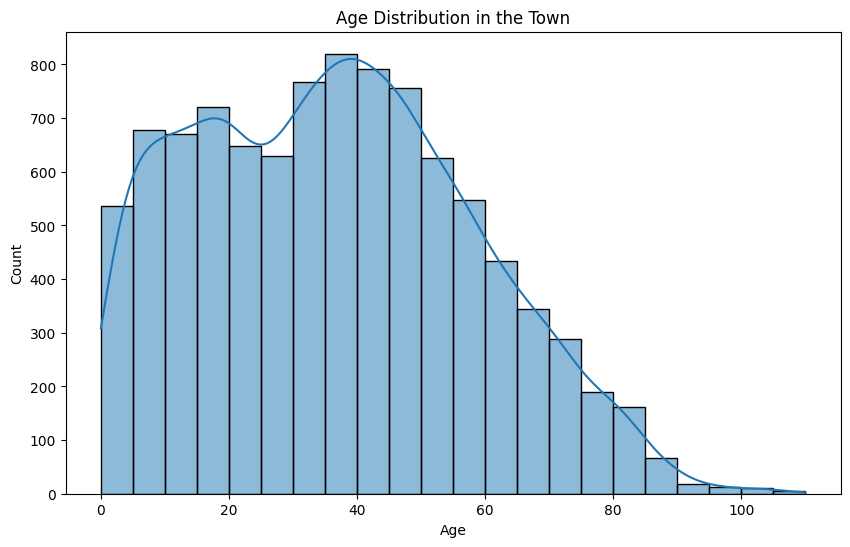

In [45]:
# Age Distribution (Age Pyramid)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', binwidth=5, kde=True)
plt.title('Age Distribution in the Town')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age Analysis by Household

In [46]:
# Grouping by household and calculate statistics for age
household_age_df = df.groupby(['House Number', 'Street', 'Relationship to Head of House'])['Age'].describe()

# Reseting index to make 'House Number', 'Street', and 'Relationship to Head of House' into columns
household_age_df = household_age_df.reset_index()

# Displaying the resulting DataFrame
household_age_df.head()

House Number       Street Relationship to Head of House  count  mean  std  \
0             1  Ahmed Drive                          Head    1.0  61.0  NaN   
1             1  Ahmed Drive                       Husband    1.0  63.0  NaN   
2             1  Ahmed Drive                           Son    1.0  24.0  NaN   
3             1  Allen Forks                          Head    1.0  81.0  NaN   
4             1  Allen Forks                          Wife    1.0  81.0  NaN   

    min   25%   50%   75%   max  
0  61.0  61.0  61.0  61.0  61.0  
1  63.0  63.0  63.0  63.0  63.0  
2  24.0  24.0  24.0  24.0  24.0  
3  81.0  81.0  81.0  81.0  81.0  
4  81.0  81.0  81.0  81.0  81.0

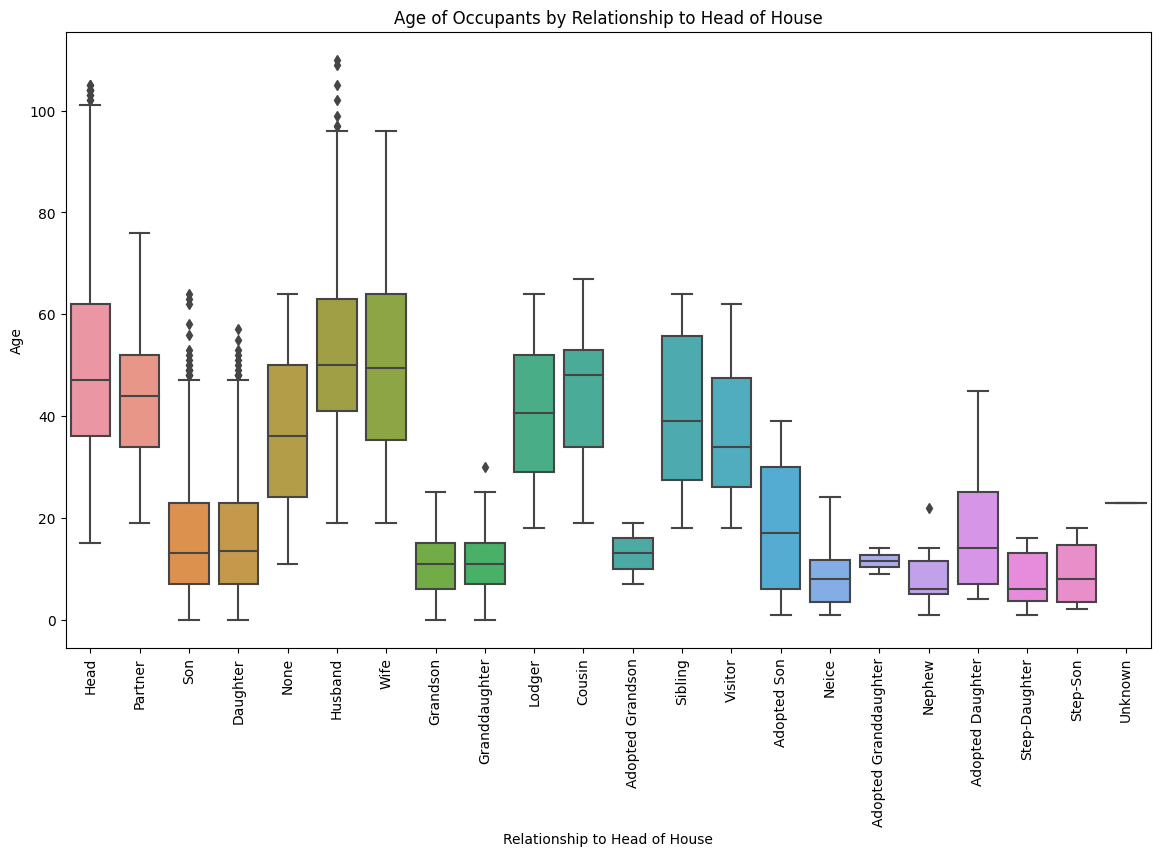

<Figure size 640x480 with 0 Axes>

In [47]:
# Creating a boxplot of age by relationship to head of house
plt.figure(figsize=(14, 8))
sns.boxplot(x='Relationship to Head of House', y='Age', data=df)
plt.title('Age of Occupants by Relationship to Head of House')
plt.xlabel('Relationship to Head of House')
plt.ylabel('Age')
plt.xticks(rotation=90)  # Rotate the labels to make them readable
plt.show()
plt.savefig('age_vs_Rhh_2')

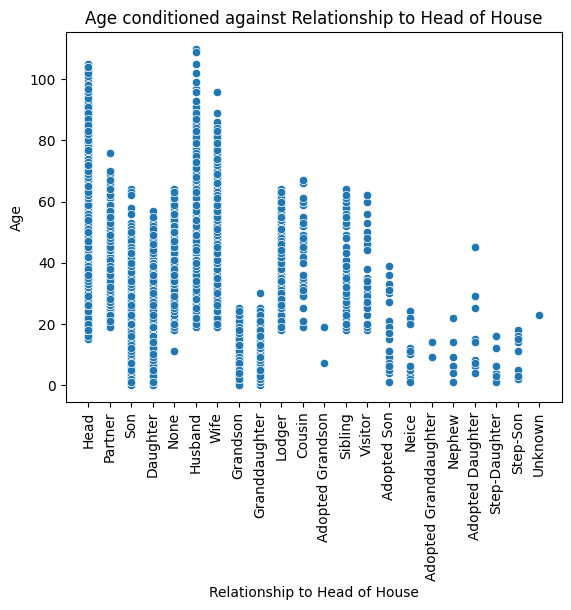

<Figure size 640x480 with 0 Axes>

In [48]:
# Age conditioned against Relationship to Head of House
age_vs_Rhh = sns.scatterplot(data=df, x='Relationship to Head of House', y='Age')
plt.xticks(rotation=90)
plt.title("Age conditioned against Relationship to Head of House")
plt.show()
plt.savefig('age_vs_Rhh')

## Employment and Unemployment Trends

This analysis focuses on understanding employment patterns in the town, especially among different age groups.

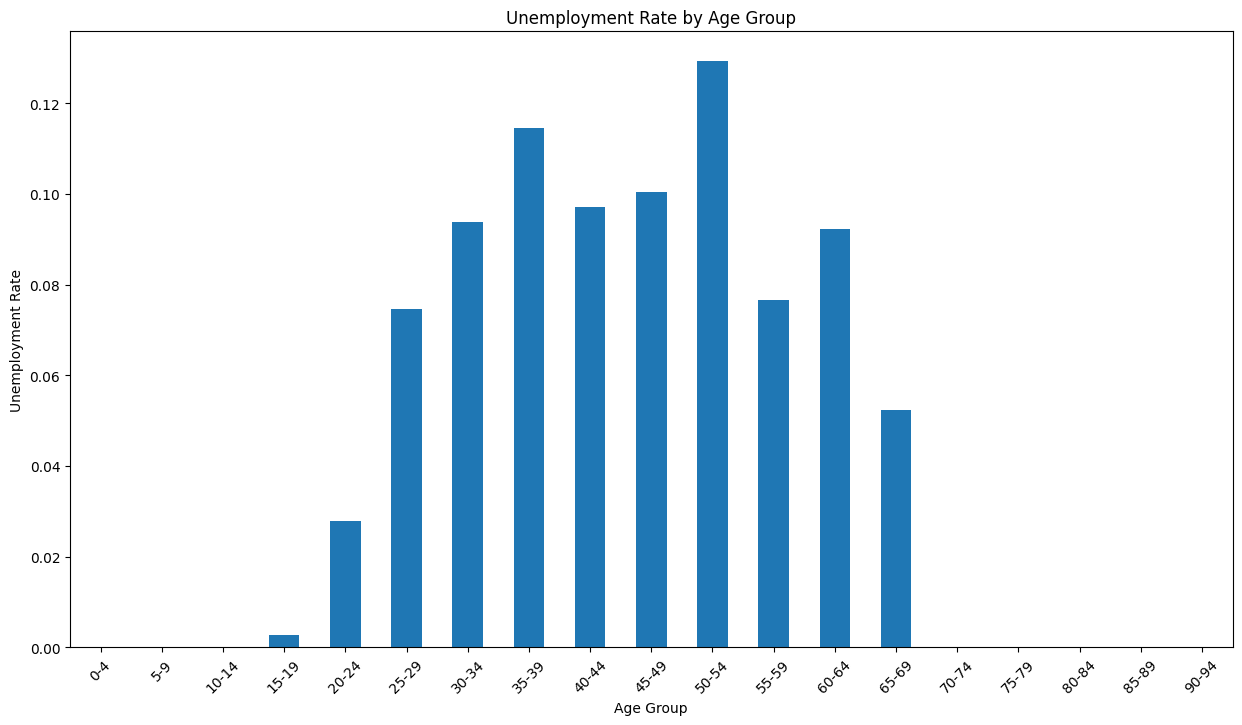

In [49]:
# Aggregating ages into ranges if individual years are not critical
bins = list(range(0, 100, 5))  
age_labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=age_labels, right=False)

# Calculating the unemployment rate by age group
unemployment_rate_by_group = df[df['Occupation'] == 'Unemployed'].groupby('Age Group').size() / df.groupby('Age Group').size()

# Plotting the unemployment rate by age group
plt.figure(figsize=(15, 8))  # Increasing the figure size to spread out x-axis labels
unemployment_rate_by_group.plot(kind='bar')
plt.title('Unemployment Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotating the x-axis labels to make them more legible
plt.show()

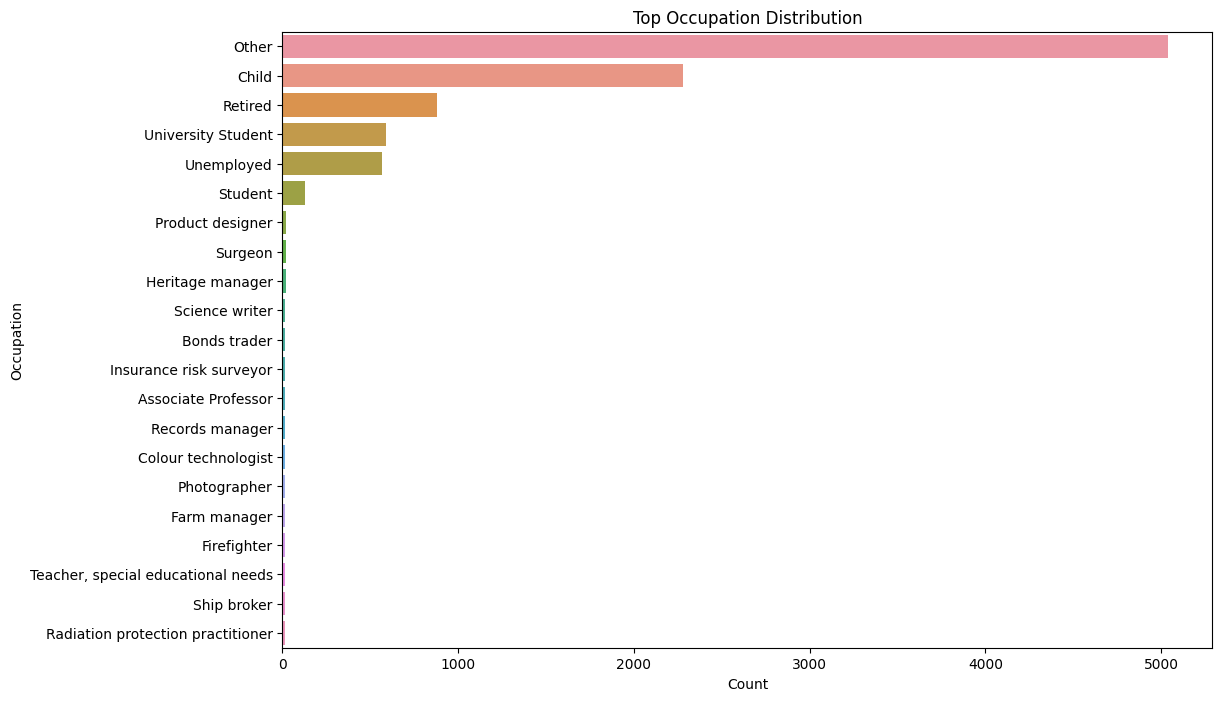

In [50]:
# Defining a threshold to only display the top 20 occupations
top_n = 20

# Calculating occupation counts and get the top N occupations
occupation_counts = df['Occupation'].value_counts()
top_occupations = occupation_counts.head(top_n).index

# Grouping all other occupations into an 'Other' category
df['Occupation_Categorized'] = df['Occupation'].apply(lambda x: x if x in top_occupations else 'Other')

# Plotting the distribution of the top N occupations including 'Other'
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation_Categorized', data=df,
              order=df['Occupation_Categorized'].value_counts().index)
plt.title('Top Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

### Identifying small occupations

In [51]:
# Calculating the counts of each occupation
occupation_counts = df['Occupation'].value_counts()

# Filtering out occupations with fewer than 100 people
small_occupations = occupation_counts[occupation_counts < 100]

# Displaying the occupations with their counts
print(small_occupations)

Surgeon                        19
Product designer               19
Heritage manager               18
Science writer                 17
Bonds trader                   17
                               ..
Forest/woodland manager         2
Production assistant, radio     2
Educational psychologist        2
Applications developer          1
Unknown                         1
Name: Occupation, Length: 640, dtype: int64


### Occupation Plot

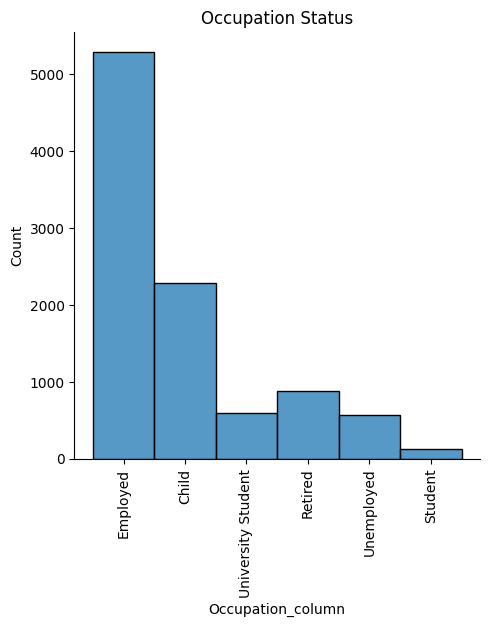

<Figure size 640x480 with 0 Axes>

In [52]:
occupation_status = sns.displot(df, x="Occupation_column")
plt.xticks(rotation=90)
plt.title("Occupation Status")
plt.show()
plt.savefig('occupation_status')

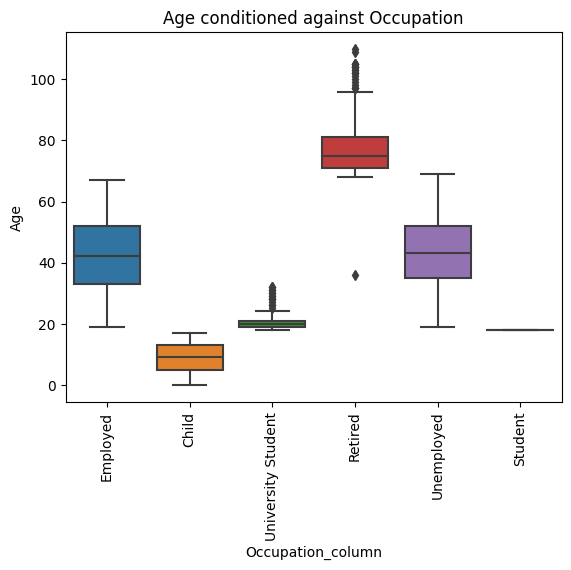

In [53]:
# Age conditioned against Occupation
age_vs_occupation = sns.boxplot(data=df, y="Age", x="Occupation_column")
plt.title("Age conditioned against Occupation")
plt.xticks(rotation=90)
plt.savefig('age_vs_occupation')

## Calculating number of small occupations and total types of occupations

In [54]:
# Calculating the counts of each occupation
occupation_counts = df['Occupation'].value_counts()

# Filtering out occupations with fewer than 100 people
small_occupations = occupation_counts[occupation_counts < 100]

# Getting the count of small occupations
small_occupations_count = small_occupations.size

# Getting the total count of unique occupations
total_occupations_count = occupation_counts.size

print(f"Count of small occupations (<100 people): {small_occupations_count}")
print(f"Total count of unique occupations: {total_occupations_count}")

Count of small occupations (<100 people): 640
Total count of unique occupations: 645


## Analyzing Marital Status

The analysis provides insight into the marital status distribution.

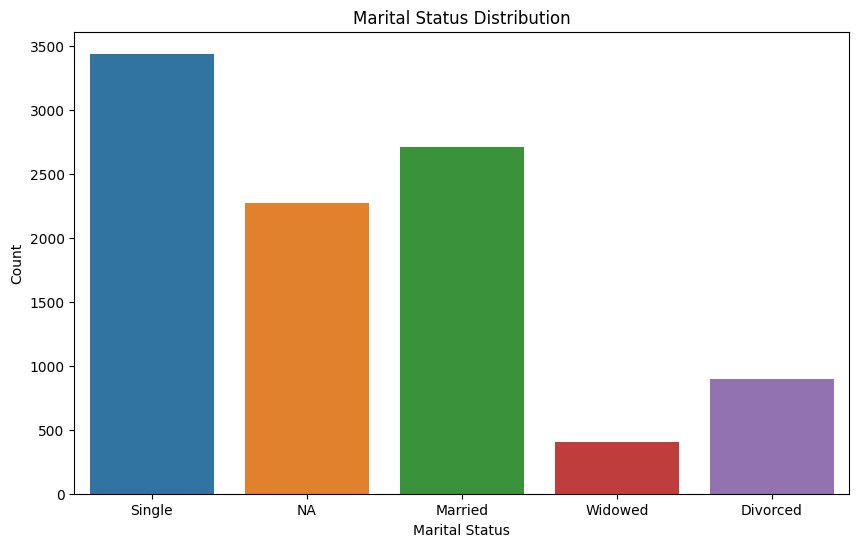

In [55]:
# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

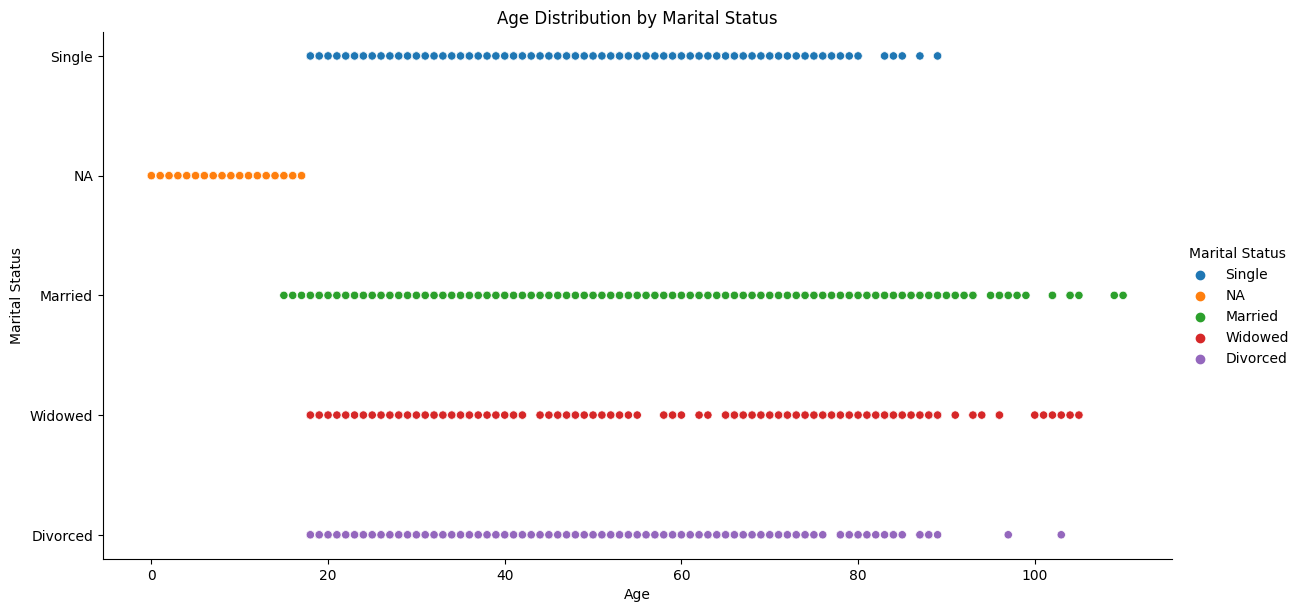

In [56]:
# Age Distribution by Marital Status
Age_distribution_vs_MS2 = sns.relplot(df, x = 'Age', y='Marital Status', hue='Marital Status', height=6, aspect=2)
plt.title('Age Distribution by Marital Status')
plt.savefig('Age_distribution_vs_MS2')

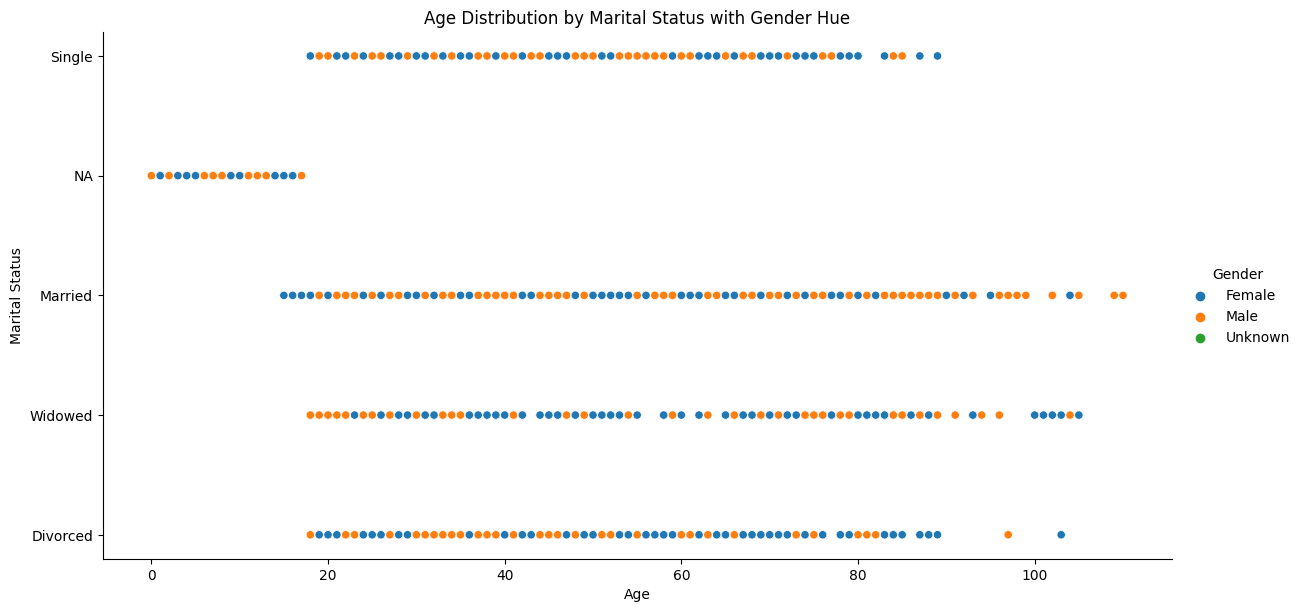

In [57]:
# Age Distribution by Marital Status with Gender Hue
Age_distribution_vs_MS3 = sns.relplot(df, x = 'Age', y='Marital Status', hue='Gender', height=6, aspect=2)
plt.title('Age Distribution by Marital Status with Gender Hue')
plt.savefig('Age_distribution_vs_MS3')

## Religion Plot

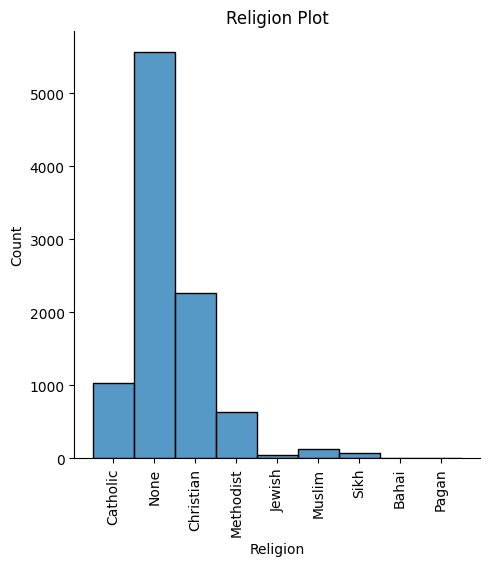

<Figure size 640x480 with 0 Axes>

In [58]:
Religion_plot = sns.displot(df, x="Religion")
plt.xticks(rotation=90)
plt.title("Religion Plot")
plt.show()
plt.savefig('Religion_plot')

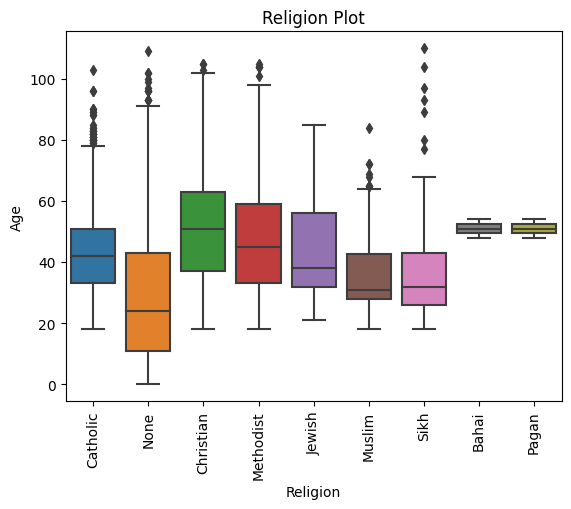

<Figure size 640x480 with 0 Axes>

In [59]:
# Religion by age
Religion_plot2 = sns.boxplot(df, x="Religion", y="Age")
plt.xticks(rotation=90)
plt.title("Religion Plot")
plt.show()
plt.savefig('Religion_plot2')

## Infirmity Plot

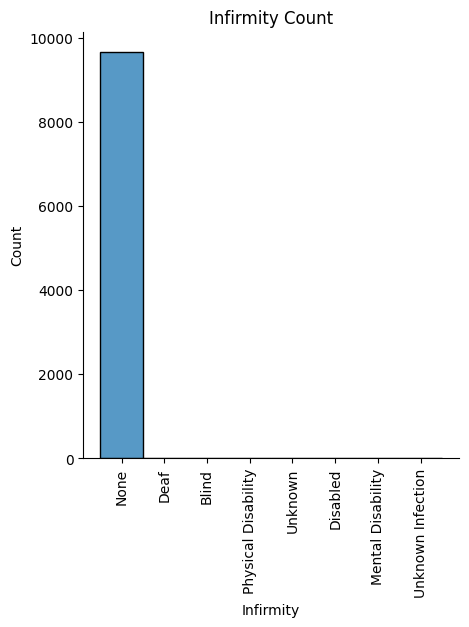

<Figure size 640x480 with 0 Axes>

In [60]:
# Infirmity Count
Infirmity_vs_age = sns.displot(df, x="Infirmity")
plt.xticks(rotation=90)
plt.title("Infirmity Count")
plt.show()
plt.savefig('Infirmity')

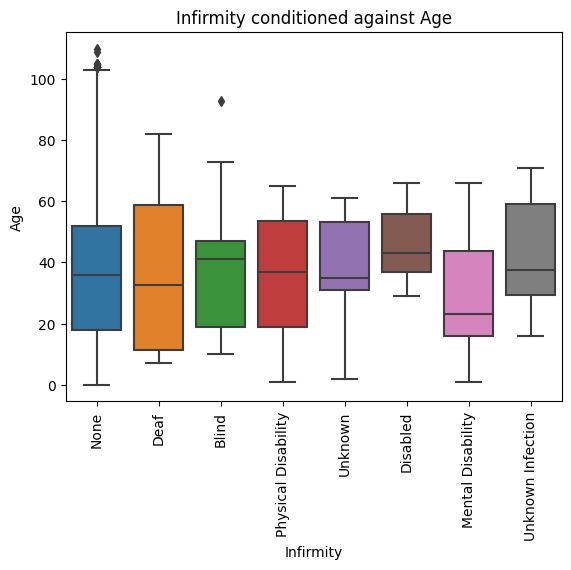

<Figure size 640x480 with 0 Axes>

In [61]:
# Infirmity conditioned against Age
Infirmity_vs_age = sns.boxplot(df, x="Infirmity", y="Age")
plt.xticks(rotation=90)
plt.title("Infirmity conditioned against Age")
plt.show()
plt.savefig('Infirmity_vs_age')

## Marital Status Plot

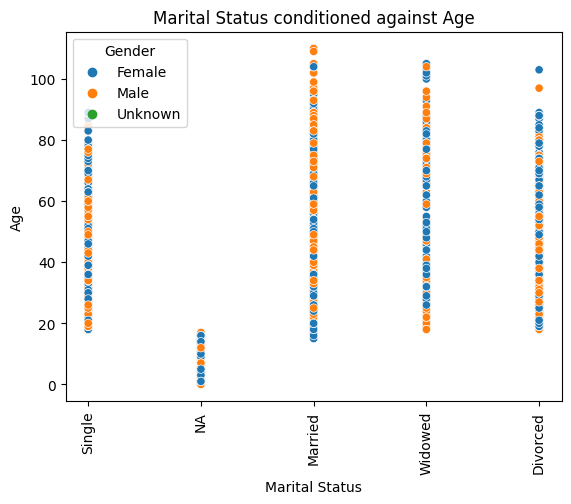

<Figure size 640x480 with 0 Axes>

In [62]:
# Marital Status conditioned against Age
MS_vs_Age = sns.scatterplot(data=df, x="Marital Status", y="Age", hue="Gender")
plt.xticks(rotation=90)
plt.title("Marital Status conditioned against Age")
plt.show()
plt.savefig('MS_vs_Age')

## Population Pyramid

In [63]:
# Available on: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html
# Grouping by 'Age Group' and 'Gender', and counting the number of individuals
grouped_df = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

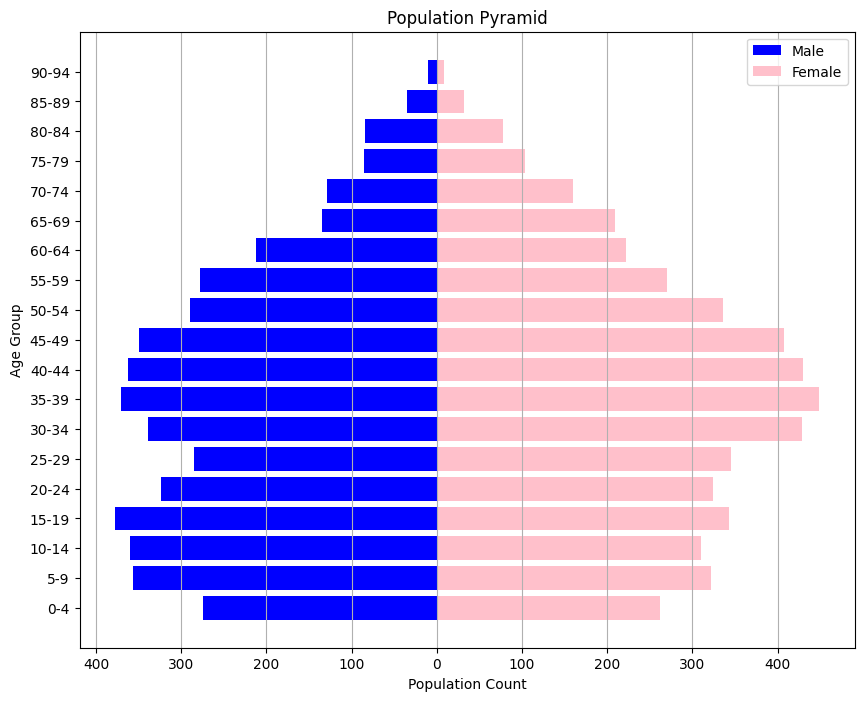

In [64]:
# Plotting the population pyramid
plt.figure(figsize=(10, 8))

# Plotting males on the left
plt.barh(grouped_df.index, -grouped_df['Male'], color='blue', label='Male')

# Plotting females on the right
plt.barh(grouped_df.index, grouped_df['Female'], color='pink', label='Female')

# Adding labels and title
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Population Pyramid')
plt.yticks(rotation=0)
plt.xticks(ticks=[-400, -300, -200, -100, 0, 100, 200, 300, 400],
labels=['400', '300', '200', '100','0', '100', '200', '300', '400'])

# Adding legend
plt.legend()

# Adding grid
plt.grid(axis='x')

# Show plot
plt.show()

# Pandas Profiling

In [65]:
# !pip install ydata-profiling

In [66]:
# Loading a summary of the entire dataset using pandas profiling
from ydata_profiling import ProfileReport

C:\Program Files\Python311\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\796656\AppData\Roaming\Python\Python311\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [67]:
df_plot = ProfileReport(df, title="Census Report")
df_plot.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Examining the divorce and marriage rate

In [68]:
# Calculating the total number of individuals
total_individuals = len(df)

# Calculating the number of married and divorced individuals
num_married = len(df[df['Marital Status'] == 'Married'])
num_divorced = len(df[df['Marital Status'] == 'Divorced'])

# Calculating proportions
prop_married = num_married / total_individuals
prop_divorced = num_divorced / total_individuals

print(f"Proportion of Married Individuals: {prop_married:.2%}")
print(f"Proportion of Divorced Individuals: {prop_divorced:.2%}")

Proportion of Married Individuals: 27.86%
Proportion of Divorced Individuals: 9.20%


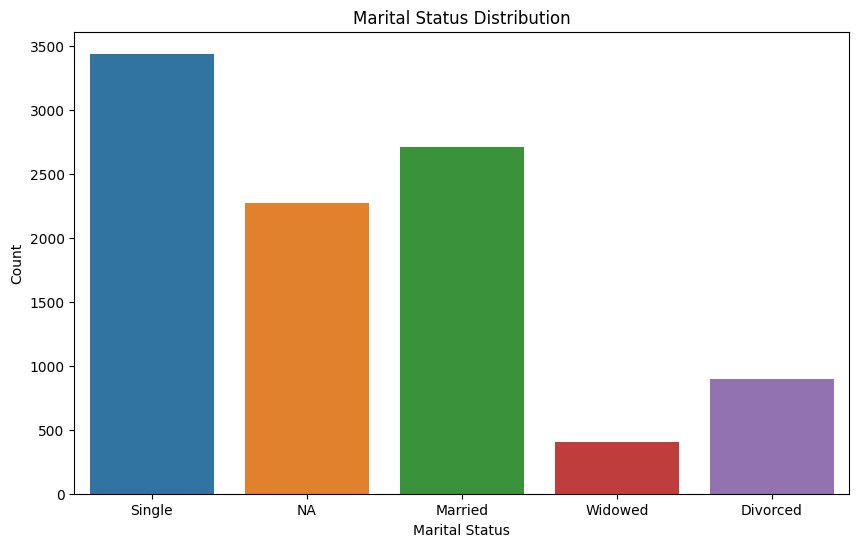

In [69]:
# Plotting the distribution of marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Examining the occupancy level

In [70]:
# Grouping by 'House Number' and 'Street' and counting the number of people in each household
household_sizes = df.groupby(['House Number', 'Street']).size()

# Display the first few rows of household sizes
print(household_sizes.head())

House Number  Street           
1             Ahmed Drive          3
              Allen Forks          2
              Anvil Crescent       1
              Appletree Heights    4
              Apricot Rapids       3
dtype: int64


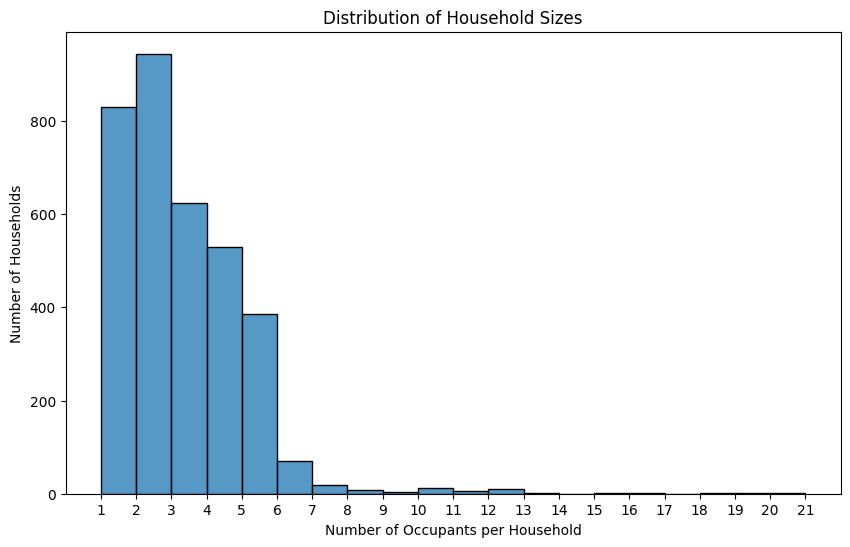

In [71]:
# Plotting the distribution of household sizes
plt.figure(figsize=(10, 6))
sns.histplot(household_sizes, bins=range(1, household_sizes.max() + 1), kde=False)
plt.title('Distribution of Household Sizes')
plt.xlabel('Number of Occupants per Household')
plt.ylabel('Number of Households')
plt.xticks(range(1, household_sizes.max() + 1))
plt.show()

In [72]:
# Calculating the mean and median of household sizes
mean_household_size = household_sizes.mean()
median_household_size = household_sizes.median()

print(f"Mean Household Size: {mean_household_size:.2f}")
print(f"Median Household Size: {median_household_size:.2f}")

Mean Household Size: 2.82
Median Household Size: 2.00


# Examining the number of university students

In [73]:
# Counting the number of university students
num_students = len(df[df['Occupation'].str.contains('Student', case=False, na=False)])
print(f"Number of University Students: {num_students}")

Number of University Students: 721


In [74]:
# Possible commuter occupations
commuter_occupations = ['Consultant', 'Manager', 'Engineer', 'Scientist', 'Technician', 'Developer', 'Salesperson', 'Executive']

# Count individuals in each of these occupations
for occupation in commuter_occupations:
    count = len(df[df['Occupation'].str.contains(occupation, case=False, na=False)])
    print(f"Number of {occupation}s: {count}")

Number of Consultants: 67
Number of Managers: 438
Number of Engineers: 503
Number of Scientists: 246
Number of Technicians: 35
Number of Developers: 19
Number of Salespersons: 0
Number of Executives: 67


In [78]:
# Define the occupation counts as provided
occupation_counts = {
    'Consultant': 67,
    'Manager': 438,
    'Engineer': 503,
    'Scientist': 246,
    'Technician': 35,
    'Developer': 19,
    'Salesperson': 0,
    'Executive': 67
}

# Assume total_population variable holds the total number of individuals in the dataset
total_population = len(df) 

# Calculate the sum of commuters by summing the values in the occupation_counts dictionary
commuters_sum = sum(occupation_counts.values())

# Calculate the percentage of the population that are commuters
commuter_percentage = (commuters_sum / total_population) * 100

commuter_percentage

14.134457236842104

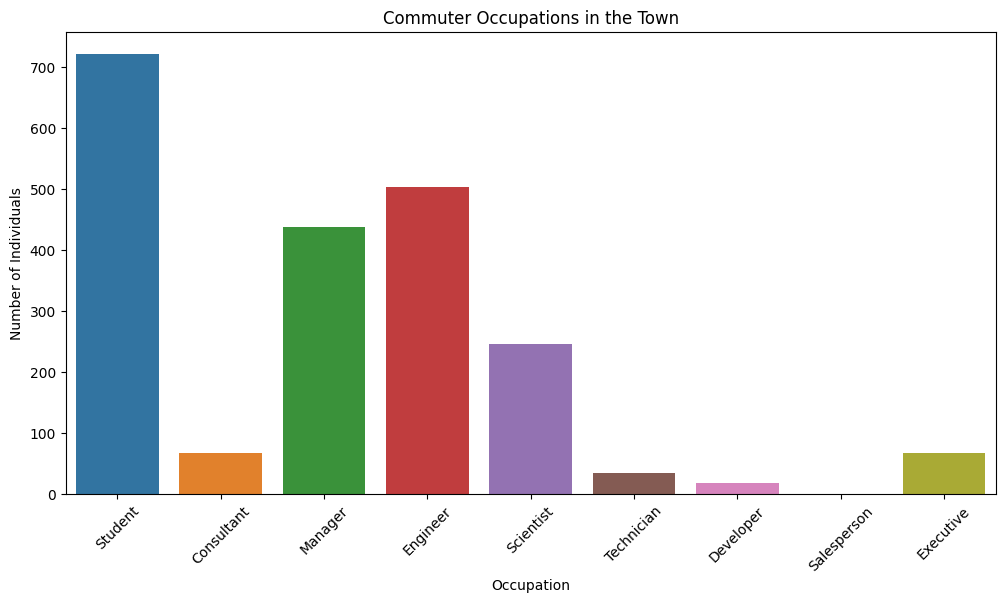

In [75]:
# Create a DataFrame for visualization
occupations = ['Student'] + commuter_occupations
counts = [num_students] + [len(df[df['Occupation'].str.contains(occupation, case=False, na=False)]) for occupation in commuter_occupations]

commuter_df = pd.DataFrame({'Occupation': occupations, 'Count': counts})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Count', data=commuter_df)
plt.title('Commuter Occupations in the Town')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

# Birth rate Estimate

In [76]:
# Finding how many recent births there are
recent_births = len(df[df['Age'] == 0])

# Total population
total_population = len(df)

# Birth rate per 1,000 individuals
birth_rate = (recent_births / total_population) * 1000

print(f"Estimated Birth Rate: {birth_rate:.2f} per 1,000 individuals")

Estimated Birth Rate: 9.97 per 1,000 individuals


# Death rate Estimate

In [77]:
# Assuming elderly individuals (e.g., age 75 and older) contribute to the death rate
elderly_population = len(df[df['Age'] >= 75])

# Considering infirmities that might contribute to death rate
death_contributing_infirmities = len(df[df['Infirmity'] == 'Unknown Infection'])

# Death rate per 1,000 individuals
death_rate = ((elderly_population + death_contributing_infirmities) / total_population) * 1000

print(f"Estimated Death Rate: {death_rate:.2f} per 1,000 individuals")

Estimated Death Rate: 48.73 per 1,000 individuals
